### Convolutional Neural Networks in Python with Keras
In this tutorial, you’ll learn how to implement Convolutional Neural Networks (CNNs) in Python with Keras, and how to overcome overfitting with dropout.
You might have already heard of image or facial recognition or self-driving cars. These are real-life implementations of Convolutional Neural Networks (CNNs). In this blog post, you will learn and understand how to implement these deep, feed-forward artificial neural networks in Keras and also learn how to overcome overfitting with the regularization technique called "dropout".

More specifically, you'll tackle the following topics in today's tutorial:

- You will be introduced to convolutional neural networks;
- Then, you'll first try to understand the data. You'll use Python and its libraries to load, explore and analyze your data,
-  After that, you'll preprocess your data: you'll learn how to resize, rescale, convert your labels into one-hot encoding vectors and split up your data in training and validation sets;
-  With all of this done, you can construct the neural network model: you'll learn how to model the data and form the network. Next, you'll compile, train and evaluate the model, visualizing the accuracy and loss plots;
- Then, you will learn about the concept of overfitting and how you can overcome it by adding a dropout layer;
- With this information, you can revisit your original model and re-train the model. You'll also re-evaluate your new model and compare the results of both the models;
- Next, you'll make predictions on the test data, convert the probabilities into class labels and plot few test samples that your model correctly classified and incorrectly classified;
- Finally, you will visualize the classification report which will give you more in-depth intuition about which class was (in)correctly classified by your model.


### Convolutional Neural Network: Introduction
By now, you might already know about machine learning and deep learning, a computer science branch that studies the design of algorithms that can learn. Deep learning is a subfield of machine learning that is inspired by artificial neural networks, which in turn are inspired by biological neural networks.

A specific kind of such a deep neural network is the convolutional network, which is commonly referred to as CNN or ConvNet. It's a deep, feed-forward artificial neural network. Remember that feed-forward neural networks are also called multi-layer perceptrons(MLPs), which are the quintessential deep learning models. The models are called "feed-forward" because information flows right through the model. There are no feedback connections in which outputs of the model are fed back into itself.

CNNs specifically are inspired by the biological visual cortex. The cortex has small regions of cells that are sensitive to the specific areas of the visual field. This idea was expanded by a captivating experiment done by Hubel and Wiesel in 1962 (if you want to know more, here's a video). In this experiment, the researchers showed that some individual neurons in the brain activated or fired only in the presence of edges of a particular orientation like vertical or horizontal edges. For example, some neurons fired when exposed to vertical sides and some when shown a horizontal edge. Hubel and Wiesel found that all of these neurons were well ordered in a columnar fashion and that together they were able to produce visual perception. This idea of specialized components inside of a system having specific tasks is one that machines use as well and one that you can also find back in CNNs.

Convolutional neural networks have been one of the most influential innovations in the field of computer vision. They have performed a lot better than traditional computer vision and have produced state-of-the-art results. These neural networks have proven to be successful in many different real-life case studies and applications, like:

- Image classification, object detection, segmentation, face recognition;
- Self driving cars that leverage CNN based vision systems;
- Classification of crystal structure using a convolutional neural network;
- And many more, of course!
To understand this success, you'll have to go back to 2012, the year in which Alex Krizhevsky used convolutional neural networks to win that year's ImageNet Competition, reducing the classification error from 26% to 15%.

Note that ImageNet Large Scale Visual Recognition Challenge (ILSVRC) began in the year 2010 is an annual competition where research teams assess their algorithms on the given data set and compete to achieve higher accuracy on several visual recognition tasks.

This was the time when neural networks regained prominence after quite some time. This is often called the "third wave of neural networks". The other two waves were in the 1940s until the 1960s and in the 1970s to 1980s.

Alright, you know that you'll be working with feed-forward networks that are inspired by the biological visual cortex, but what does that actually mean?

Take a look at the picture:

[Convolutional Neural Network](https://commons.wikimedia.org/wiki/File:Typical_cnn.png)

The image shows you that you feed an image as an input to the network, which goes through multiple convolutions, subsampling, a fully connected layer and finally outputs something.

But what are all these concepts?

The convolution layer computes the output of neurons that are connected to local regions or receptive fields in the input, each computing a dot product between their weights and a small receptive field to which they are connected to in the input volume. Each computation leads to extraction of a feature map from the input image. In other words, imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window or kernel around the image. At each position of that matrix, you multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. As a result, you'll get a single number that represents all the values in that window of the images. You use this layer to filtering: as the window moves over the image, you check for patterns in that section of the image. This works because of filters, which are multiplied by the values outputted by the convolution.
The objective of subsampling is to get an input representation by reducing its dimensions, which helps in reducing overfitting. One of the techniques of subsampling is max pooling. With this technique, you select the highest pixel value from a region depending on its size. In other words, max pooling takes the largest value from the window of the image currently covered by the kernel. For example, you can have a max-pooling layer of size 2 x 2 will select the maximum pixel intensity value from 2 x 2 region. You're right to think that the pooling layer then works a lot like the convolution layer! You also take a kernel or a window and move it over the image; The only difference is the function that is applied to the kernel and the image window isn't linear.


[Max Pooling](https://en.wikipedia.org/wiki/Convolutional_neural_network#/media/File:Max_pooling.png)

The objective of the fully connected layer is to flatten the high-level features that are learned by convolutional layers and combining all the features. It passes the flattened output to the output layer where you use a softmax classifier or a sigmoid to predict the input class label.
For more information, you can go here.


### The Fashion-MNIST Data Set
Before you go ahead and load in the data, it's good to take a look at what you'll exactly be working with! The Fashion-MNIST dataset is a dataset of Zalando's article images, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images. You can double check this later when you have loaded in your data! ;)

Fashion-MNIST is similar to the MNIST dataset that you might already know, which you use to classify handwritten digits. That means that the image dimensions, training and test splits are similar to the MNIST dataset. Tip: if you want to learn how to implement an Multi-Layer Perceptron (MLP) for classification tasks with this latter dataset, go to this tutorial.

You can find the Fashion-MNIST dataset here, but you can also load it with the help of specific TensorFlow and Keras modules. You'll see how this works in the next section!

### Load the Data
Keras comes with a library called datasets, which you can use to load datasets out of the box: you download the data from the server and speeds up the process since you no longer have to download the data to your computer. The train and test images along with the labels are loaded and stored in variables `train_X`, `train_Y`, `test_X`, `test_Y`, respectively.

#### Problem 1 
- Import the `fashion_mnist` dataset from `keras.datasets`
- Load the data into local variables `train_X`, `train_Y`, `test_X`, `test_Y`

In [2]:
# Problem 1 Code below
from keras.datasets import fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()



### Analyze the Data
Let's now analyze how images in the dataset look like. Even though you know the dimension of the images by now, it's still worth the effort to analyze it programmatically: you might have to rescale the image pixels and resize the images.

In [3]:
import numpy as np
from keras.utils import to_categorical as to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


From the above output, you can see that the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.

#### Problem 2
- Find number of unique classes in `train_Y` and print classes

In [64]:
#plt.hist(train_Y)
# 10 classes
# 0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9

train_Y_classes = np.unique(train_Y)
# print('Total number of outputs : ', nClasses)
# print('Output classes : ', classes)
print(train_Y_classes)

[0 1 2 3 4 5 6 7 8 9]


There's also a total of ten output classes that range from 0 to 9.

Also, don't forget to take a look at what the images in your dataset:

Text(0.5, 1.0, 'Ground Truth : 9')

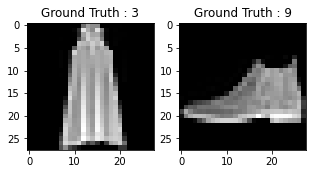

In [68]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[20,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[20]))
#you can play around with these values in train_X to see different examples atd


# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

The output of above two plots looks like an ankle boot, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 ankle boot images will have a class label of 9.

### Data Preprocessing
As you could see in the above plot, the images are grayscale images have pixel values that range from 0 to 255. Also, these images have a dimension of 28 x 28. As a result, you'll need to preprocess the data before you feed it into the model. 

As a first step, convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

#### Problem 3
- Reshape `train_X` and `test_X` into (28, 28, 1)

In [6]:
# Problem 3 Code below
from numpy import reshape 
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive. So let's do that!

#### Problem 4
- Convert `train_X` and `test_X` into `float32`
- Max (255) normalize `train_X` and `test_X`

In [7]:
# Problem 4 Code below
# train_X = to_categorical(
#     train_X, num_classes=None, dtype='float32')
# test_X = to_categorical(
#     test_X, num_classes=None, dtype='float32')

# train_X.dtype

#This keeps restarting my kernel and not working. why??

train_X = train_X.astype(float)
test_X = test_X.astype(float)
print(train_X.dtype, test_X.dtype)


train_X = train_X/255.0
test_X = test_X/255.0

print(train_X.shape, test_X.shape)

float64 float64
(60000, 28, 28, 1) (10000, 28, 28, 1)


Now you need to convert the class labels into a one-hot encoding vector.
In one-hot encoding, you convert the categorical data into a vector of numbers. The reason why you convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. You generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

For your problem statement, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1. For example, the ankle boot image that you plotted above has a label of 9, so for all the ankle boot images, the one hot encoding vector would be [0 0 0 0 0 0 0 0 1 0].

So let's convert the training and testing labels into one-hot encoding vectors:

#### Problem 5 
- Change the labels from categorical to one-hot encoding
- Use variables `train_Y_one_hot` and `test_Y_one_hot`

In [8]:
# Problem 5 Code below

train_Y_one_hot = to_categorical(train_Y, num_classes= 10)
test_Y_one_hot = to_categorical(test_Y, num_classes = 10)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


That's pretty clear, right? Note that you can also print the train_Y_one_hot, which will display a matrix of size 60000 x 10 in which each row depicts one-hot encoding of an image.

This last step is a crucial one. In machine learning or any data specific task, you should partition the data correctly. For the model to generalize well, you split the training data into two parts, one designed for training and another one for validation. In this case, you will train the model on 80\% of the training data and validate it on 20\% of the remaining training data. This will also help to reduce overfitting since you will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

#### Problem 6 
- Split training and testing into `train_X`, `valid_X`, `train_label`, `valid_label`
- Use 20% of your dataset as testing and `random_state=13`

In [9]:
# Problem 6 Code below
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2, random_state=13)
print("train_X shape",train_X.shape)
print("valid_X shape",valid_X.shape)
print("train_label shape",train_label.shape)
print("valid_label shape",valid_label.shape)

#Wheres the 10?

train_X shape (48000, 28, 28, 1)
valid_X shape (12000, 28, 28, 1)
train_label shape (48000, 10)
valid_label shape (12000, 10)


For one last time let's check the shape of training and validation set.

In [10]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

### The Network
The images are of size 28 x 28. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

You'll use three convolutional layers:

- The first layer will have 32-3 x 3 filters,
- The second layer will have 64-3 x 3 filters and
- The third layer will have 128-3 x 3 filters.
- In addition, there are three max-pooling layers each of size 2 x 2.

[Network Architecture](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1512486717/fashion-mnist-architecture_htbpsz.png)

### Model the Data
First, let's import all the necessary modules required to train the model.

In [11]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

You will use a batch size of 64 using a higher batch size of 128 or 256 is also preferable it all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy. You will train the network for 10 epochs (for runtime purposes).

In [12]:
batch_size = 64
epochs = 10
num_classes = 10

### Neural Network Architecture
In Keras, you can just stack up layers by adding the desired layer one by one. That's exactly what you'll do here: you'll first add a first convolutional layer with Conv2D(). Note that you use this function because you're working with images! Next, you add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. Since you have ten different classes, you'll need a non-linear decision boundary that could separate these ten classes which are not linearly separable.

More specifically, you add Leaky ReLUs because they attempt to fix the problem of dying Rectified Linear Units (ReLUs). The ReLU activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. As of 2017, this activation function is the most popular one for deep neural networks. The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

Next, you'll add the max-pooling layer with MaxPooling2D() and so on. The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.



#### Problem 7 
- Define the Keras model as `fashion_model`
- Follow the Network Architecture defined [here](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1512486717/fashion-mnist-architecture_htbpsz.png)
- You will need to use the following Keras functions:
    - `Sequential`
    - `Conv2D`
    - `LeakyReLU`
    - `MaxPooling2D`
    - `Flatten`
    - `Dense`
- Hint: Check out the model summary below

In [13]:
# Problem 7 Code below
input_shape = (28, 28, 1)
    
fashion_model = keras.models.Sequential()
fashion_model.add(keras.layers.Conv2D(32, kernel_size = (3,3), padding = 'same', input_shape=input_shape))
fashion_model.add(keras.layers.LeakyReLU())
fashion_model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
fashion_model.add(keras.layers.Conv2D(64, kernel_size = (3,3), padding = 'same'))
fashion_model.add(keras.layers.LeakyReLU())
fashion_model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
fashion_model.add(keras.layers.Conv2D(128, kernel_size = (3,3), padding = 'same'))
fashion_model.add(keras.layers.LeakyReLU())
fashion_model.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding= 'same'))
fashion_model.add(keras.layers.Flatten())
fashion_model.add(keras.layers.Dense(units = 128))
fashion_model.add(keras.layers.LeakyReLU())
fashion_model.add(keras.layers.Dense(units = 10, activation ='softmax'))

    


















### Compile the Model
After the model is created, you compile it using the Adam optimizer, one of the most popular optimization algorithms. You can read more about this optimizer here. Additionally, you specify the loss type which is categorical cross entropy which is used for multi-class classification, you can also use binary cross-entropy as the loss function. Lastly, you specify the metrics as accuracy which you want to analyze while the model is training.

#### Problem 8
- Compile `fashion_model` using `categorical_crossentropy` and the `Adam` optimizer

In [29]:
# Problem 8 Code below
cce = keras.losses.CategoricalCrossentropy()
Adam = keras.optimizers.Adam()
fashion_model.compile(optimizer = 'Adam', loss= cce, metrics = ['accuracy'])
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

Let's visualize the layers that you created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in your model.

In [15]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

### Train the Model
It's finally time to train the model with Keras' `fit()` function! The model trains for 20 epochs. The `fit()` function will return a history object; By storying the result of this function in fashion_train, you can use it later to plot the accuracy and loss function plots between training and validation which will help you to analyze your model's performance visually.
- Note that this will take approximately 20 minutes to run

#### Problem 9 
* Fit the model with `train_X` and `train_label`
* Use `batch_size`, `epochs`, and you validation data as well (`valid_X`, `valid_label`)
* Write output to `fashion_train`

In [30]:
# Problem 9 Code below

fashion_train = fashion_model.fit(x = train_X, y = train_label, batch_size = batch_size, epochs = 20, validation_data = (valid_X, valid_label),)


print(fashion_train)



Epoch 1/20
750/750 [==============================] - 42s 56ms/step - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.7069 - val_accuracy: 0.9178
Epoch 2/20
750/750 [==============================] - 45s 61ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.7407 - val_accuracy: 0.9147
Epoch 3/20
750/750 [==============================] - 38s 50ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.7308 - val_accuracy: 0.9118
Epoch 4/20
750/750 [==============================] - 42s 56ms/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.6731 - val_accuracy: 0.9169
Epoch 5/20
750/750 [==============================] - 44s 58ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.9151 - val_accuracy: 0.9104
Epoch 6/20
750/750 [==============================] - 39s 52ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.7383 - val_accuracy: 0.9118
Epoch 7/20
750/750 [==============================] - 42s 55ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.7668 - val_accuracy:

Finally! You trained the model on fashion-MNIST for 10 epochs, and by observing the training accuracy and loss, you can say that the model did a good job since after 10 epochs the training accuracy is 97% and the training loss is quite low.

However, it looks like the model is overfitting, as the validation accuracy is 92%. Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

You probably need to handle this. In next sections, you'll learn how you can make your model perform much better by adding a Dropout layer into the network and keeping all the other layers unchanged.

But first, let's evaluate the performance of your model on the test set before you come on to a conclusion.

### Model Evaluation on the Test Set

#### Problem 10
* Evaluate `fashion_model` below on `test_X` and `test_Y_one_hot`

In [33]:
# Problem 10 Code below
eval_fashion_model = fashion_model.evaluate(test_X, test_Y_one_hot)
print(eval_fashion_model)


313/313 [==============================] - 2s 7ms/step - loss: 0.9120 - accuracy: 0.9122
[0.9119893312454224, 0.9121999740600586]


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3018389679595828
Test accuracy: 0.9162


The test accuracy looks impressive. It turns out that your classifier does better than the benchmark that was reported here, which is an SVM classifier with mean accuracy of 0.897. Also, the model does well compared to some of the deep learning models mentioned on the GitHub profile of the creators of fashion-MNIST dataset.

However, you saw that the model looked like it was overfitting. Are these results really all that good?

Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

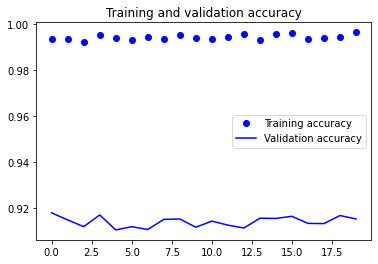

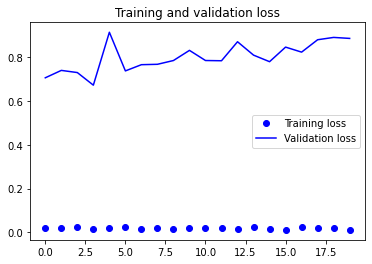

In [35]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

With this in mind, it's time to introduce some dropout into our model and see if it helps in reducing overfitting.

### Adding Dropout into the Network
You can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

So let's create, compile and train the network again but this time with dropout. And run it for 20 epochs with a batch size of 64.



In [36]:
batch_size = 64
epochs = 20
num_classes = 10

#### Problem 11
* Reuse `fashion_model` defintion from Problem 7
* Add Dropout layers 
    * Add 25% Dropout after first 2 Max Pooling Layers
    * Add 40% Dropout after last Max Pooling Layer
    * Add 30% Dropout after last Leaky ReLU Layer

In [43]:
# Problem 11 Code below


fashion_model = keras.models.Sequential()
fashion_model.add(keras.layers.Conv2D(32, kernel_size = (3,3), input_shape=input_shape, padding = 'same'))
fashion_model.add(keras.layers.LeakyReLU())
fashion_model.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding ='same'))
fashion_model.add(keras.layers.Dropout(.25))
fashion_model.add(keras.layers.Conv2D(64, kernel_size = (3,3), padding = 'same'))
fashion_model.add(keras.layers.LeakyReLU())
fashion_model.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
fashion_model.add(keras.layers.Dropout(.25))
fashion_model.add(keras.layers.Conv2D(128, kernel_size = (3,3), padding = 'same'))
fashion_model.add(keras.layers.LeakyReLU())
fashion_model.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
fashion_model.add(keras.layers.Dropout(.40))
fashion_model.add(keras.layers.Flatten())
fashion_model.add(keras.layers.Dense(units = 128))
fashion_model.add(keras.layers.LeakyReLU())
fashion_model.add(keras.layers.Dropout(.30))
fashion_model.add(keras.layers.Dense(units = 10, activation ='softmax'))



fashion_model.summary()














Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)         

In [27]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [44]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [45]:
fashion_train_dropout = fashion_model.fit(train_X,
                                          train_label,
                                          batch_size=batch_size,
                                          epochs=epochs,
                                          verbose=1,
                                          validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 51s 68ms/step - loss: 0.5645 - accuracy: 0.7940 - val_loss: 0.3587 - val_accuracy: 0.8681
Epoch 2/20
750/750 [==============================] - 49s 65ms/step - loss: 0.3656 - accuracy: 0.8678 - val_loss: 0.3096 - val_accuracy: 0.8858
Epoch 3/20
750/750 [==============================] - 49s 65ms/step - loss: 0.3201 - accuracy: 0.8812 - val_loss: 0.2850 - val_accuracy: 0.8966
Epoch 4/20
750/750 [==============================] - 47s 63ms/step - loss: 0.3036 - accuracy: 0.8879 - val_loss: 0.2538 - val_accuracy: 0.9064
Epoch 5/20
750/750 [==============================] - 53s 71ms/step - loss: 0.2843 - accuracy: 0.8948 - val_loss: 0.2621 - val_accuracy: 0.9049
Epoch 6/20
750/750 [==============================] - 47s 63ms/step - loss: 0.2757 - accuracy: 0.8970 - val_loss: 0.2472 - val_accuracy: 0.9099
Epoch 7/20
750/750 [==============================] - 46s 62ms/step - loss: 0.2645 - accuracy: 0.9030 - val_loss: 0.2540 - val_accuracy:

Let's save the model so that you can directly load it and not have to train it again for 20 epochs. This way, you can load the model later on if you need it and modify the architecture; Alternatively, you can start the training process on this saved model. It is always a good idea to save the model -and even the model's weights!- because it saves you time. Note that you can also save the model after every epoch so that, if some issue occurs that stops the training at an epoch, you will not have to start the training from the beginning.m

In [46]:
fashion_model.save("fashion_model_dropout.h5py")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


### Model Evaluation on the Test Set
Finally, let's also evaluate your new model and see how it performs!

#### Problem 12
* Evaluate `fashion_model` on `test_X` and `test_Y_one_hot`
* Save results to `test_eval`

In [51]:
# Problem 12 Code below
test_eval_model = fashion_model.evaluate(test_X, test_Y_one_hot)


313/313 [==============================] - 3s 8ms/step - loss: 0.2339 - accuracy: 0.9164


In [34]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22546583181321622
Test accuracy: 0.92


Wow! Looks like adding Dropout in our model worked, even though the test accuracy did not improve significantly but the test loss decreased compared to the previous results.

Now, let's plot the accuracy and loss plots between training and validation data for the one last time.

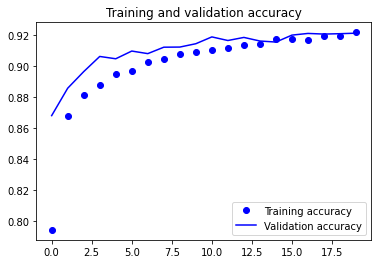

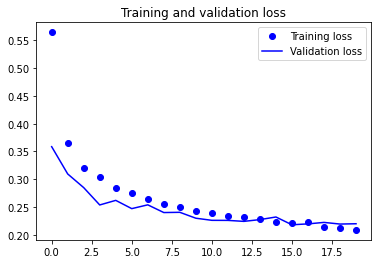

In [52]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Finally, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

Therefore, you can say that your model's generalization capability became much better since the loss on both test set and validation set was only slightly more compared to the training loss.

### Predict Labels

#### Problem 13
* Predict labels for `test_X`
* Save result to `predicted_classes`

In [53]:
# Problem 13 Code below
predicted_classes = fashion_model.predict(test_X)

Since the predictions you get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer. Further, you will use `np.argmax()` to select the index number which has a higher value in a row.

For example, let's assume a prediction for one test image to be `0 1 0 0 0 0 0 0 0 0`, the output for this should be a class label `1`.

In [54]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [55]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9120 correct labels


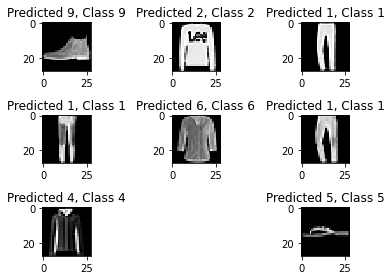

In [56]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 880 incorrect labels


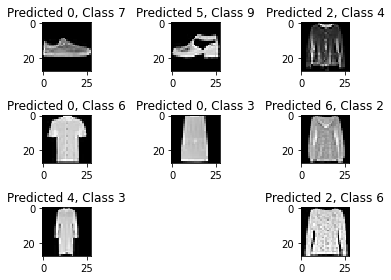

In [57]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

By looking at a few images, you cannot be sure as to why your model is not able to classify the above images correctly, but it seems like a variety of the similar patterns present on multiple classes affect the performance of the classifier although CNN is a robust architecture. For example, images 5 and 6 both belong to different classes but look kind of similar maybe a jacket or perhaps a long sleeve shirt.

### Classification Report

Classification report will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of the given ten classes.

In [59]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.75      0.92      0.83      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.85      0.89      0.87      1000
     Class 3       0.93      0.89      0.91      1000
     Class 4       0.88      0.84      0.86      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.82      0.69      0.75      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



You can see that the classifier is underperforming for class 6 regarding both precision and recall. For class 0 and class 2, the classifier is lacking precision. Also, for class 4, the classifier is slightly lacking both precision and recall.

This tutorial was good start to convolutional neural networks in Python with Keras. If you were able to follow along easily or even with little more efforts, well done! Try doing some experiments maybe with same model architecture but using different types of public datasets available.

### Acknowledgements
Adpated from: https://www.datacamp.com/community/blog/keras-cheat-sheet